In [414]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [416]:
df = pd.read_csv("C:/Users/ganes/Downloads/flight_train1.csv", encoding="utf-8")
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [418]:
df.duplicated().sum()

0

In [420]:
df.isnull().sum().any()

True

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [424]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [426]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,55000.000000,55000.000000,54658.000000,55000.000000,55000.000000,54738.000000,54937.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.00000,55000.000000
mean,31549.707145,4.115727,42.705789,13.213527,12362.465164,6002.575145,6325.644993,19256.688255,155.593436,62.979631,172.201745,0.361727,0.736753,14102.26780,2.827073
std,18177.005101,0.395579,9.803796,14.528764,17012.468908,8458.072660,9080.805391,21613.796416,169.987954,64.506386,117.382011,1.201922,0.177283,21049.88039,7.526118
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1380.000000,1.000000,0.000000,0.000000,0.000000,0.136017,0.00000,0.000000
25%,15798.750000,4.000000,35.000000,4.000000,3497.000000,1400.000000,1300.000000,6332.000000,25.000000,25.166667,90.000000,0.000000,0.629210,3796.00000,0.000000
50%,31559.500000,4.000000,42.000000,8.000000,6903.000000,3426.500000,3484.000000,11983.000000,91.000000,44.600000,149.000000,0.000000,0.720056,7611.00000,0.000000
75%,47322.250000,4.000000,48.000000,16.000000,14481.000000,7406.000000,7760.000000,23761.500000,226.000000,77.500000,230.000000,0.000000,0.813888,16046.75000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,730.000000,714.000000,719.000000,46.000000,1.500000,795398.00000,140.000000


In [428]:
# max value of age (110) does not make sense

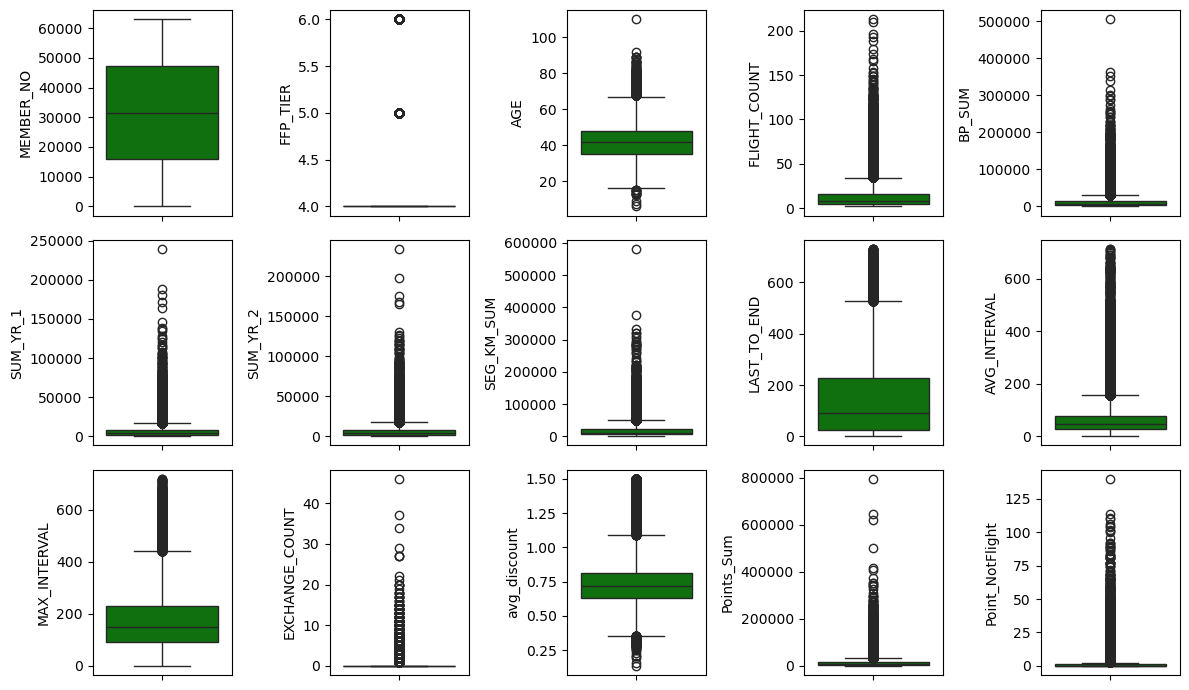

In [430]:
plt.figure(figsize = (12,7))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v', color = 'green')
    plt.tight_layout()

In [431]:
There are many outliers.
FFP_Tier seems to have discrete values ranging from 4 to 6.

SyntaxError: invalid syntax (414006749.py, line 1)

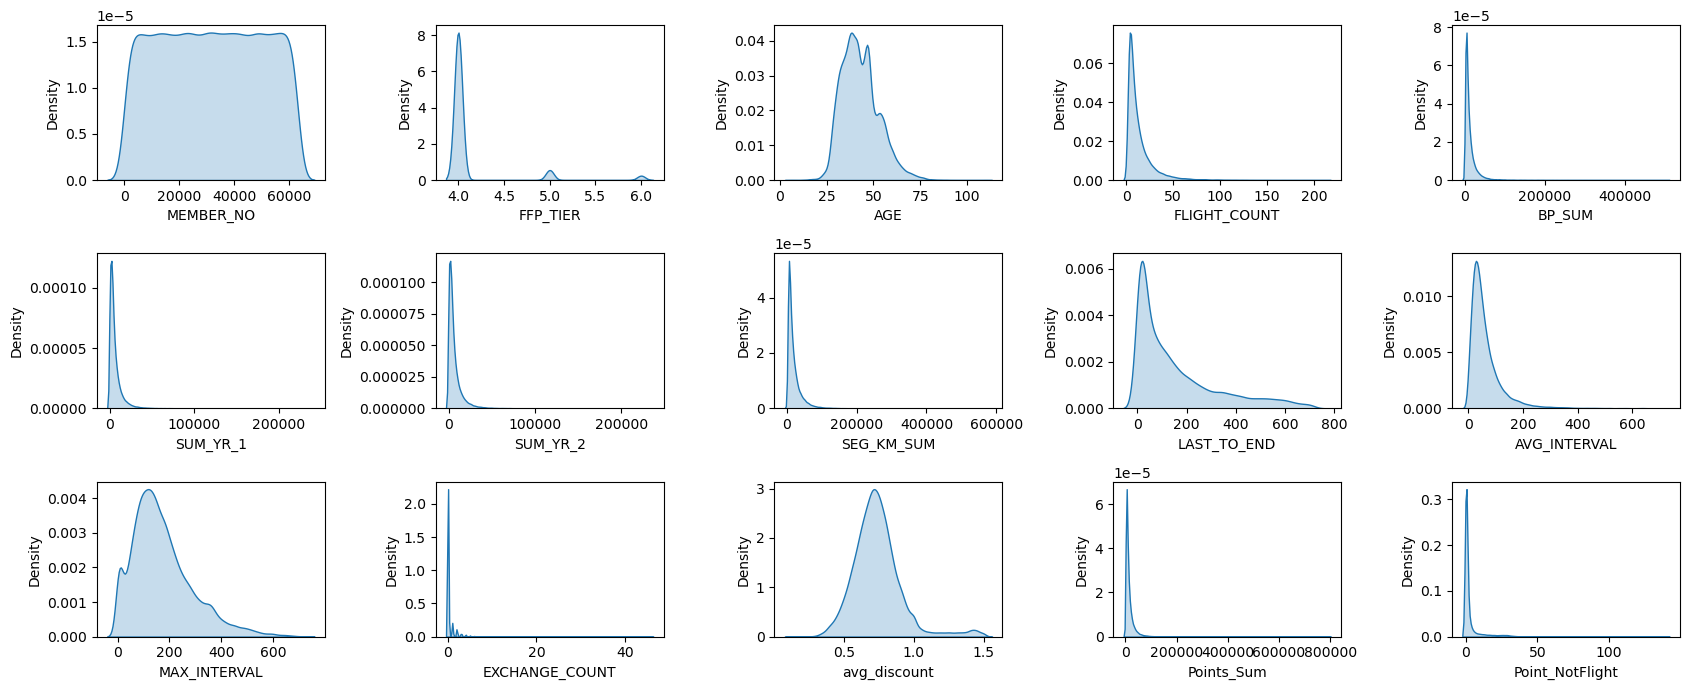

In [434]:
plt.figure(figsize=(17,7))
for i in range(0, len(nums)):
    plt.subplot(3,5, i+1)
    sns.kdeplot(data=df, x=df[nums[i]], fill='True')
    plt.tight_layout()

In [436]:
#avg_discount column has values more than 1 which means more than 100 percent discount

In [438]:
df = df[df['avg_discount']<=1]
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,52115.0,31565.098877,18185.290122,1.000000,15787.500000,31602.000000,47359.500000,62988.0
FFP_TIER,52115.0,4.093025,0.348380,4.000000,4.000000,4.000000,4.000000,6.0
AGE,51800.0,42.376544,9.675138,6.000000,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,52115.0,13.064761,14.242829,2.000000,4.000000,8.000000,16.000000,210.0
BP_SUM,52115.0,11404.482030,14556.431445,0.000000,3406.500000,6661.000000,13756.500000,505308.0
SUM_YR_1,51861.0,5596.679476,7353.586474,0.000000,1382.000000,3335.000000,7081.000000,239560.0
SUM_YR_2,52056.0,5907.412421,7992.930598,0.000000,1278.000000,3377.000000,7421.500000,234188.0
SEG_KM_SUM,52115.0,18950.567533,20984.072423,2006.000000,6351.000000,11913.000000,23426.500000,580717.0
LAST_TO_END,52115.0,155.955982,169.834457,1.000000,25.000000,92.000000,227.000000,730.0
AVG_INTERVAL,52115.0,62.925895,63.770708,0.000000,25.357143,44.812500,77.666667,713.0


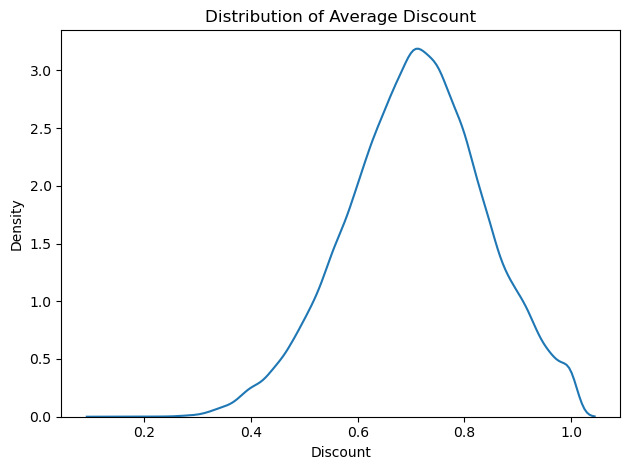

In [440]:
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

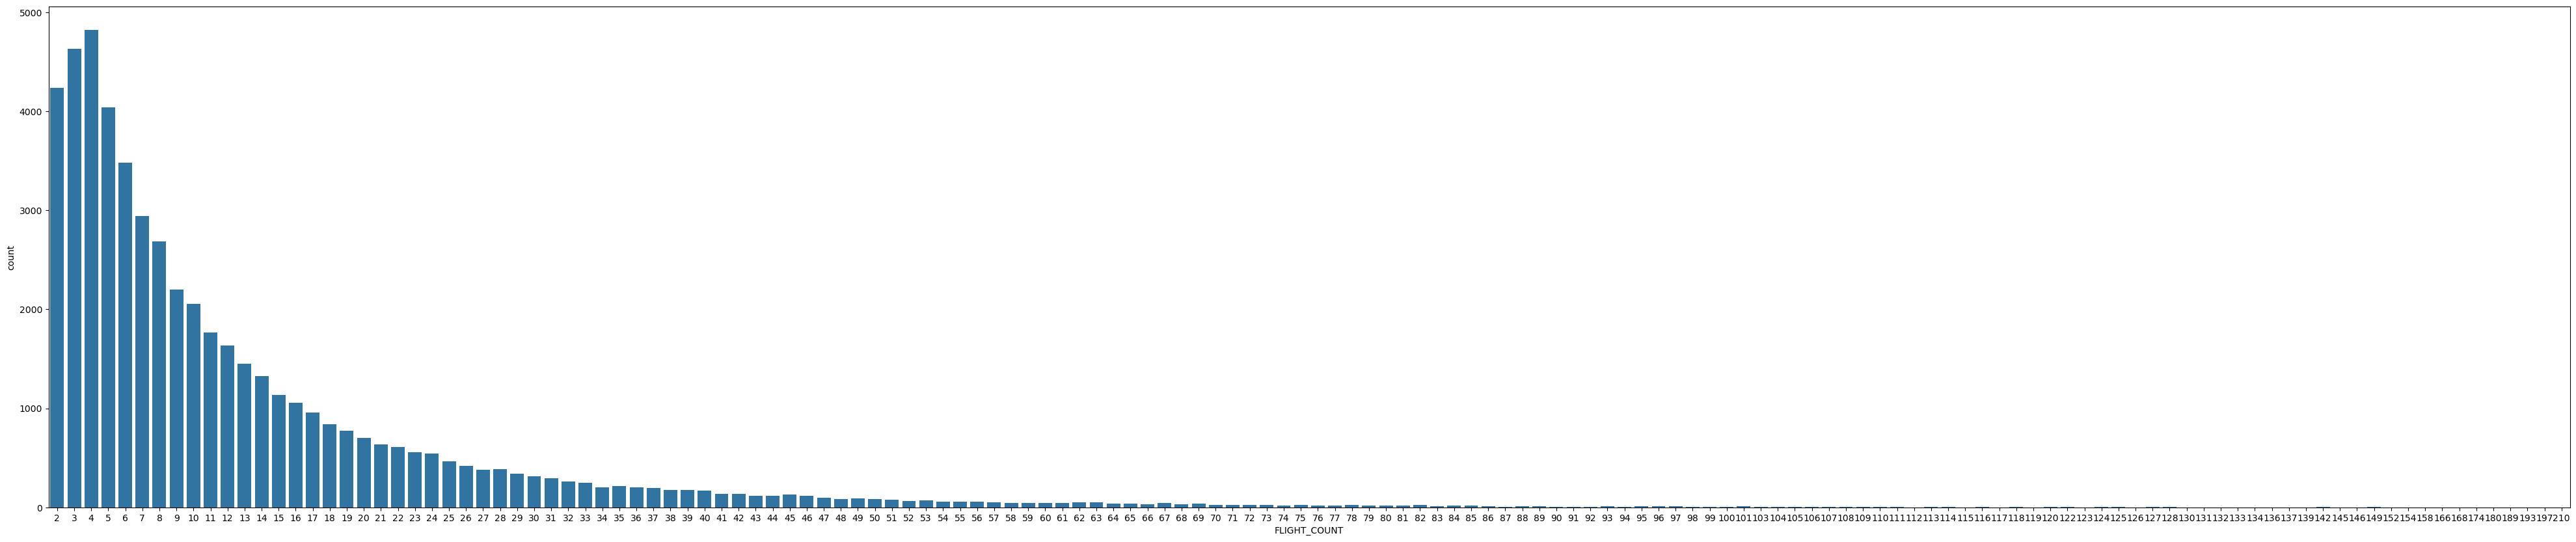

In [442]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x=df["FLIGHT_COUNT"])

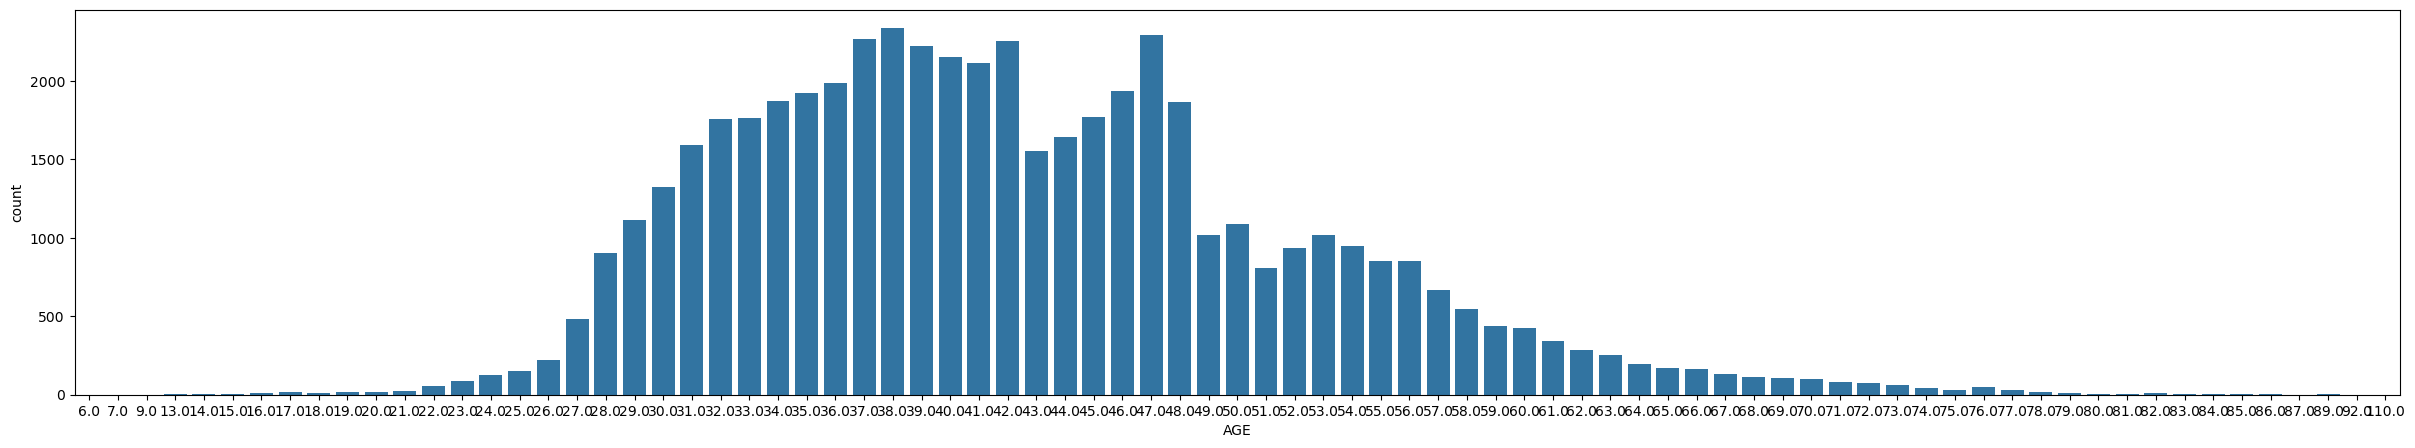

In [444]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["AGE"])

In [446]:
#Most customers are aged between 28 and 57.

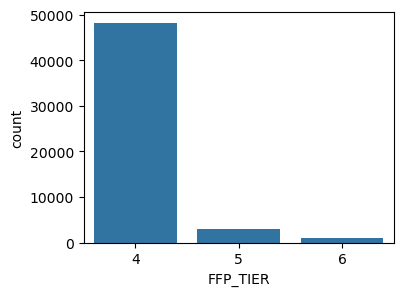

In [448]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x=df["FFP_TIER"])

In [450]:
df_numeric = df.drop(columns=['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'])

<Axes: >

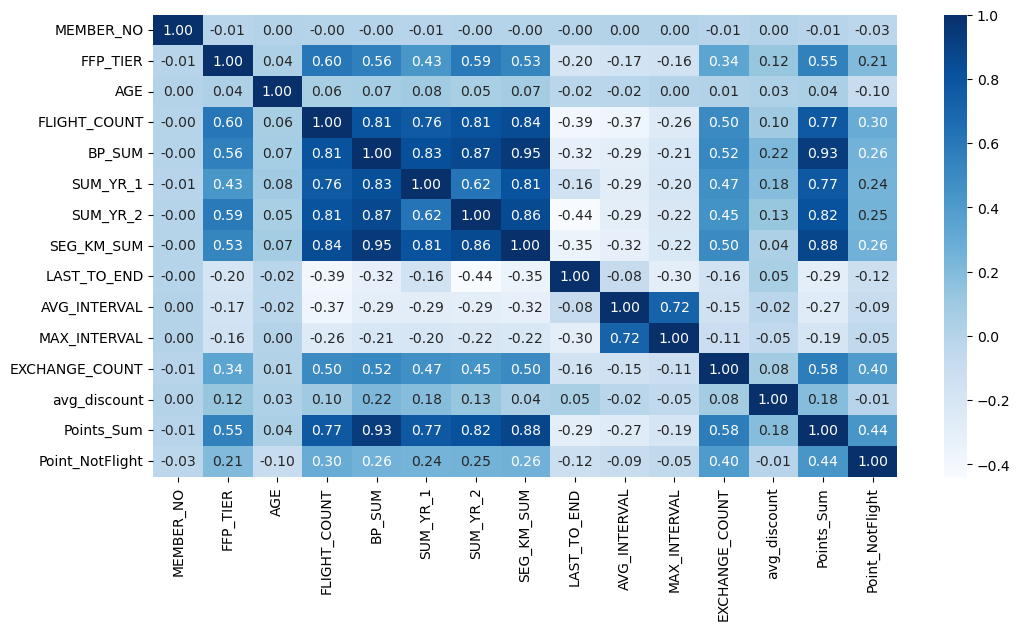

In [452]:
corr = df_numeric.corr()

# Plot the heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')

In [454]:
#FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, and Points_Sum have high multicolinearity. AVG_INTERVAL dan MAX_INTERVAL have high multicolinearity. AGE has very low correlation with all feature

In [456]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [458]:
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(0)
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(0)

In [460]:
df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [462]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

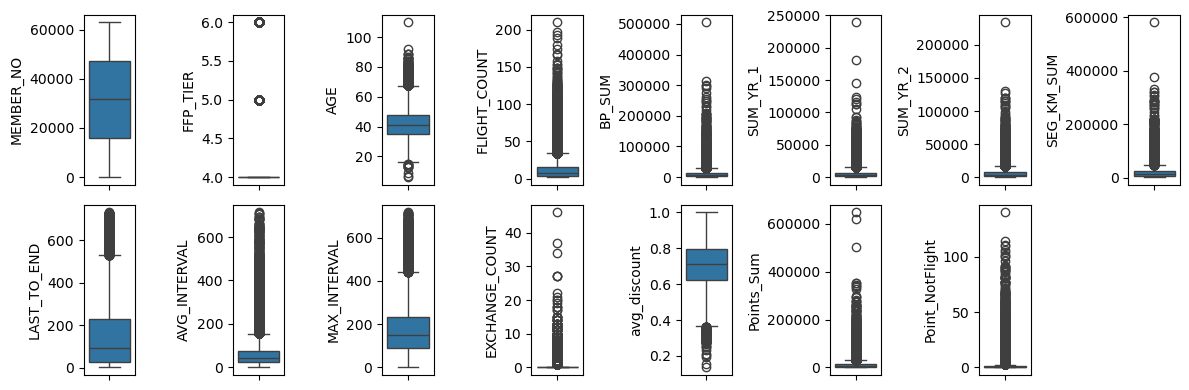

In [464]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

In [466]:
from scipy import stats


# Handling Outlier using Z-score

print(f'Total Rows BEFORE Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling = {len(df)}')

Total Rows BEFORE Outlier Handling = 52115
Total Rows AFTER Outlier Handling = 45289


In [468]:
#The features with low correlation values, which are considered unrelated to the problem-solving process, will be dropped from the dataset: member_no, age, exchange_count, sum_yr_1, sum_yr_2, point_notflight, avg_interval, max_interval

In [470]:
dfx = df.drop(['MEMBER_NO','AGE','EXCHANGE_COUNT','SUM_YR_1','SUM_YR_2','Point_NotFlight','AVG_INTERVAL','MAX_INTERVAL', 'BP_SUM','Points_Sum'], axis = 1)

In [472]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
1314,1/15/2006,1/17/2006,5,3/31/2014,46,81221,3/28/2014,4,0.779040
1385,9/1/2012,9/15/2012,5,3/31/2014,51,81466,3/31/2014,1,0.757720
1445,4/28/2006,4/28/2006,4,3/31/2014,45,72869,3/25/2014,7,0.831767
1483,8/26/2011,8/26/2011,5,3/31/2014,54,70492,3/23/2014,9,0.849685
1486,12/21/2009,6/18/2011,4,3/31/2014,18,76005,2/20/2014,41,0.786950


In [474]:
#LRFMC analysis is an extended version of RFM analysis that has been used in the aviation industry for years to divide customers into segments. Based on LRFMC analysis we will need 5 variables:

#L (Length of joining member) : The number of months since the member’s joining time from the end of the observation time. => LOAD_TIME - FFP_DATE

#R (Recent flight) : Number of months since the member’s last flight from the end of observation time. => LAST_TO_END

#F (Flight Count) : The total number of times the member has flown during the observation period. => FLIGHT_COUNT

#M (Miles Accumulated) : Miles accumulated during member observation time. => SEG_KM_SUM

#C (Discount Used) : The average value of the discount factor used by the member during the observation period. => avg_discount


In [476]:
dfa = dfx.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45289 entries, 1314 to 54999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           45289 non-null  object 
 1   FIRST_FLIGHT_DATE  45289 non-null  object 
 2   FFP_TIER           45289 non-null  int64  
 3   LOAD_TIME          45289 non-null  object 
 4   FLIGHT_COUNT       45289 non-null  int64  
 5   SEG_KM_SUM         45289 non-null  int64  
 6   LAST_FLIGHT_DATE   45289 non-null  object 
 7   LAST_TO_END        45289 non-null  int64  
 8   avg_discount       45289 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 3.5+ MB


In [478]:
dfa["LOAD_TIME"] = pd.to_datetime(dfa["LOAD_TIME"], errors='coerce')
dfa["FFP_DATE"] = pd.to_datetime(dfa["FFP_DATE"], errors='coerce')
dfa["FIRST_FLIGHT_DATE"] = pd.to_datetime(dfa["FIRST_FLIGHT_DATE"], errors='coerce')
dfa["LAST_FLIGHT_DATE"] = pd.to_datetime(dfa["LAST_FLIGHT_DATE"], errors='coerce')

In [480]:
dfa["LOAD_TIME"] = dfa["LOAD_TIME"].values.astype('datetime64[ns]')
dfa["FFP_DATE"] = dfa["FFP_DATE"].values.astype('datetime64[ns]')
dfa["FIRST_FLIGHT_DATE"] = dfa["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
dfa["LAST_FLIGHT_DATE"] = dfa["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [482]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45289 entries, 1314 to 54999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           45289 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  45289 non-null  datetime64[ns]
 2   FFP_TIER           45289 non-null  int64         
 3   LOAD_TIME          45289 non-null  datetime64[ns]
 4   FLIGHT_COUNT       45289 non-null  int64         
 5   SEG_KM_SUM         45289 non-null  int64         
 6   LAST_FLIGHT_DATE   44959 non-null  datetime64[ns]
 7   LAST_TO_END        45289 non-null  int64         
 8   avg_discount       45289 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(4)
memory usage: 3.5 MB


In [484]:
# Calculate the difference in months
dfa['Meeting_Time'] = (dfa['LOAD_TIME'] - dfa['FFP_DATE']) / pd.Timedelta(days=30.436875)  # Average days per month

# Round the values to nearest whole number
dfa['Meeting_Time'] = dfa['Meeting_Time'].round()

# Convert to numeric if needed
dfa['Meeting_Time'] = pd.to_numeric(dfa['Meeting_Time'])

In [486]:
# Calculate the number of days between FIRST_FLIGHT_DATE and LAST_FLIGHT_DATE
days_between_flights = (dfa['LAST_FLIGHT_DATE'] - dfa['FIRST_FLIGHT_DATE']).dt.days

# Calculate Flight_Count/Year
dfa['Flight_Count/Year'] = dfa['FLIGHT_COUNT'] / (days_between_flights / 365.25)  # 365.25 days in a year on average

# Round to two decimal places if needed
dfa['Flight_Count/Year'] = dfa['Flight_Count/Year'].round(2)

In [488]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
1314,2006-01-15,2006-01-17,5,2014-03-31,46,81221,2014-03-28,4,0.779040,98.0,5.62
1385,2012-09-01,2012-09-15,5,2014-03-31,51,81466,2014-03-31,1,0.757720,19.0,33.15
1445,2006-04-28,2006-04-28,4,2014-03-31,45,72869,2014-03-25,7,0.831767,95.0,5.69
1483,2011-08-26,2011-08-26,5,2014-03-31,54,70492,2014-03-23,9,0.849685,31.0,20.98
1486,2009-12-21,2011-06-18,4,2014-03-31,18,76005,2014-02-20,41,0.786950,51.0,6.72


In [490]:
dfa = dfa.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT'], axis = 1)

In [492]:

dfa.isnull().sum()

FFP_TIER               0
SEG_KM_SUM             0
LAST_TO_END            0
avg_discount           0
Meeting_Time           0
Flight_Count/Year    330
dtype: int64

In [494]:
#So the 6 features that will be used based on the results of feature enineering using LRFMC model are."

#FFP_TIER,
#SEG_KM_SUM,
#LAST_TO_END,
#avg_discount,
#Meeting_Time,
#Flight_Count/Year

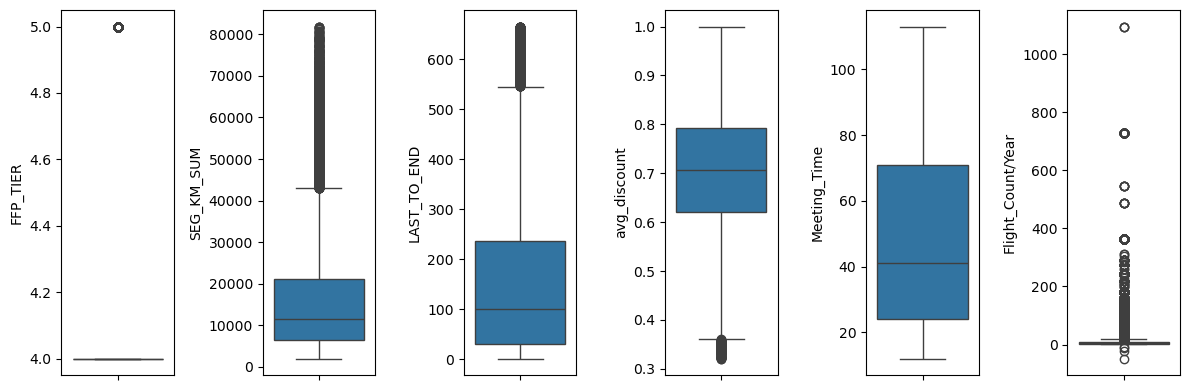

In [496]:
nums=['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = dfa[nums[i]], orient='v')
    plt.tight_layout()

In [497]:
print(f'Number of rows before filtering outliers: {len(dfa)}')

filter_entries = np.array([True] * len(dfa))
for col in ['SEG_KM_SUM', 'LAST_TO_END', 'avg_discount', 'Meeting_Time', 'Flight_Count/Year']:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_entries = ((dfa[col] >= low_limit) & (dfa[col] <= high_limit)) & filter_entries
    
dfa = dfa[filter_entries].reset_index()

print('Number of rows after filtering outliers:', len(dfa))

Number of rows before filtering outliers: 45289
Number of rows after filtering outliers: 37656


In [500]:
dfa = dfa.drop(['FFP_TIER'], axis = 1)

In [502]:
dfa = dfa[~dfa.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [504]:
from sklearn.preprocessing import StandardScaler
feats = ['SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']
X = dfa[feats].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feats)

In [506]:
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,3.055982,-0.357010,2.319085,-0.635652,2.482815
1,3.021362,-0.223410,1.921595,1.230259,-0.225275
2,2.906884,-0.587100,2.071708,1.559537,-0.452491
3,2.816512,-0.215988,2.225713,-1.367382,0.583189
4,3.041327,-1.025012,1.835694,0.352183,2.065372


<Axes: >

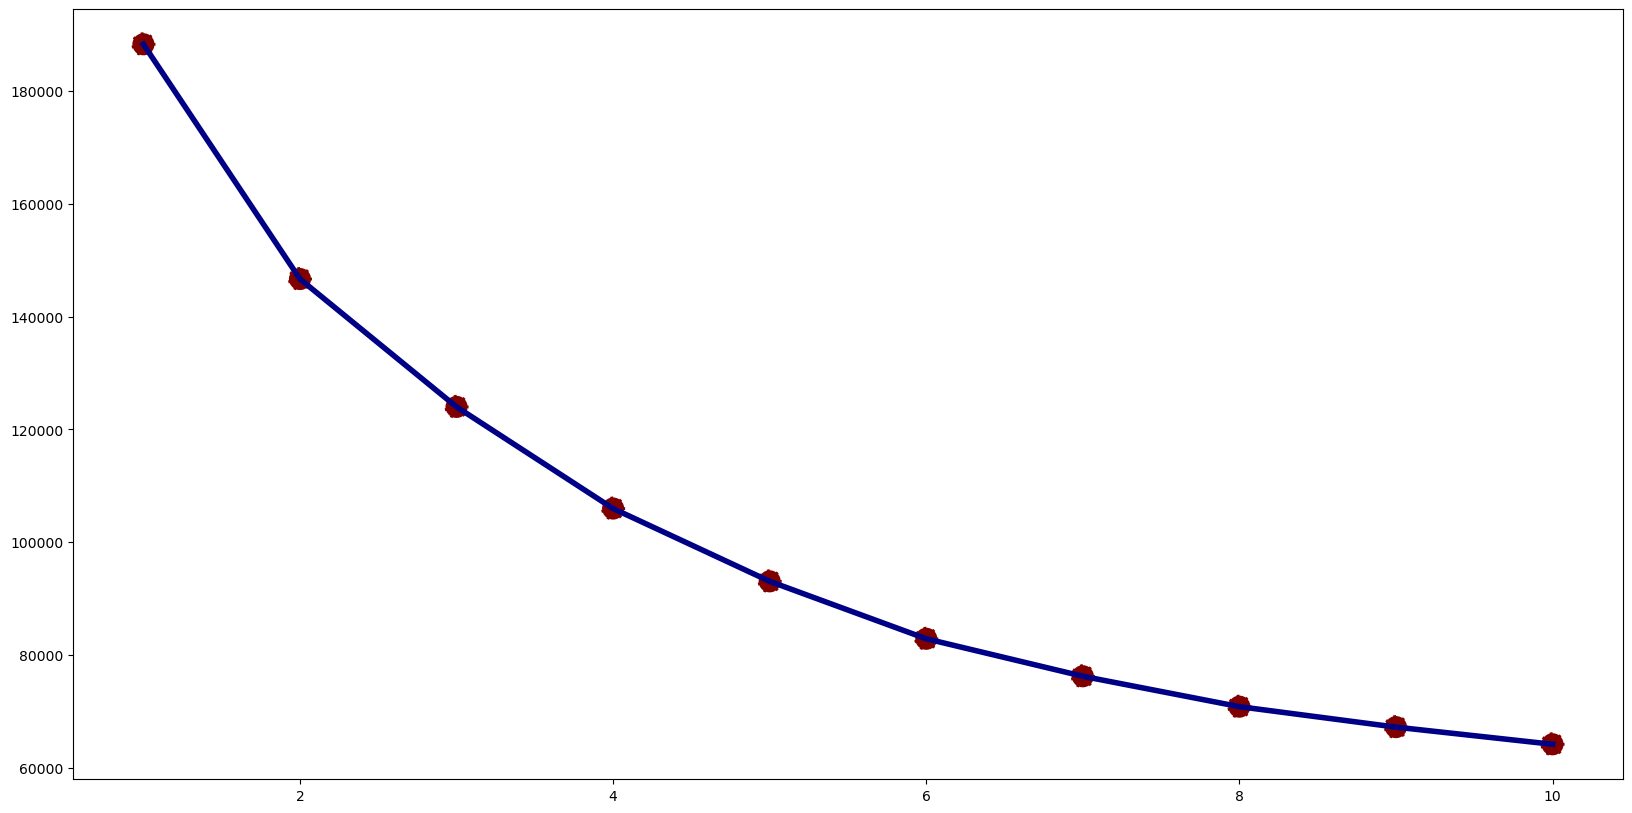

In [508]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [530]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)


KMeans(n_clusters=4, random_state=0)

In [532]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year,cluster
0,3.055982,-0.357010,2.319085,-0.635652,2.482815,3
1,3.021362,-0.223410,1.921595,1.230259,-0.225275,3
2,2.906884,-0.587100,2.071708,1.559537,-0.452491,3
3,2.816512,-0.215988,2.225713,-1.367382,0.583189,3
4,3.041327,-1.025012,1.835694,0.352183,2.065372,3


In [534]:
dfs

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year,cluster
0,3.055982,-0.357010,2.319085,-0.635652,2.482815,3
1,3.021362,-0.223410,1.921595,1.230259,-0.225275,3
2,2.906884,-0.587100,2.071708,1.559537,-0.452491,3
3,2.816512,-0.215988,2.225713,-1.367382,0.583189,3
4,3.041327,-1.025012,1.835694,0.352183,2.065372,3
...,...,...,...,...,...,...
37651,-1.126402,1.335261,-1.039149,-0.928344,-0.460417,0
37652,-1.048242,-0.431233,-1.824040,-0.452720,-0.856723,2
37653,-1.131499,1.691529,-0.976577,-1.294209,1.994037,1
37654,-1.092526,1.832551,-1.416826,0.535115,-1.099790,0


In [536]:
dfs['cluster'].nunique()

4

In [538]:
## Performing PCA for Visualization
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)


In [540]:
pcs

array([[ 2.86772788,  2.30960116],
       [ 2.71833231, -0.87145834],
       [ 2.85534729, -1.27431367],
       ...,
       [-1.68163859,  2.22935127],
       [-2.45022639, -1.07049021],
       [-0.10245106, -0.77412019]])

In [542]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,2.867728,2.309601,3
1,2.718332,-0.871458,3
2,2.855347,-1.274314,3
3,2.300931,1.449877,3
4,3.340078,1.358215,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

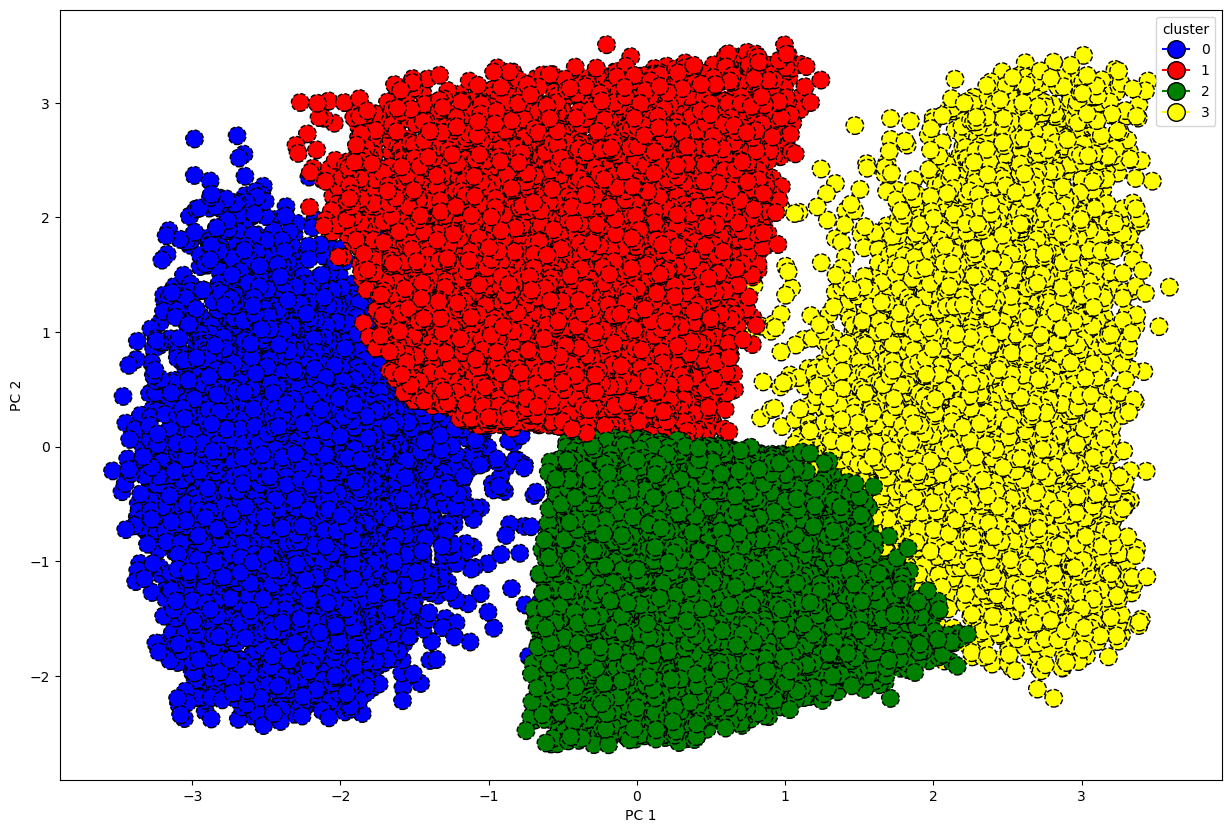

In [544]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)